In [24]:
%matplotlib notebook
# starter code
import random
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
import networkx as nx
from graph_tool.all import load_graph, shortest_distance, GraphView, pbfs_search, BFSVisitor, Graph, min_spanning_tree
from networkx.drawing.nx_agraph import graphviz_layout

from ic import simulate_cascade, observe_cascade, get_gvs, get_o2src_time, get_infection_time, gen_nontrivial_cascade
from utils import get_rank_index

seed = 123456
random.seed(seed)
np.random.seed(seed)

gtype = 'grid'
g = load_graph('data/{}/2-6/graph.gt'.format(gtype))
gnx = nx.read_graphml('data/{}/2-6/graph.graphml'.format(gtype))
gnx = nx.relabel_nodes(gnx, {i: int(i) for i in gnx.nodes_iter()})
N1, N2 = 100, 100
p, q = 0.5, 0.5

gvs = get_gvs(g, p, N2)
pos = graphviz_layout(gnx, root=0)
infection_times, source, obs_nodes, true_tree = gen_nontrivial_cascade(g, p, q, return_tree=True)

In [25]:
from graph_tool.search import bfs_search
from steiner_tree_mst import MyVisitor, init_visitor

def all_nodes_reachable_from_root(g, root):
    vis = init_visitor(g, root)
    bfs_search(g, source=root, visitor=vis)    
    return np.all(vis.dist.a >= 0)

In [26]:
from steiner_tree_region_mst import steiner_tree_region_mst
steiner_tree, gc, region_graph = steiner_tree_region_mst(g, source, infection_times, source, obs_nodes, return_closure=True)

<IPython.core.display.Javascript object>


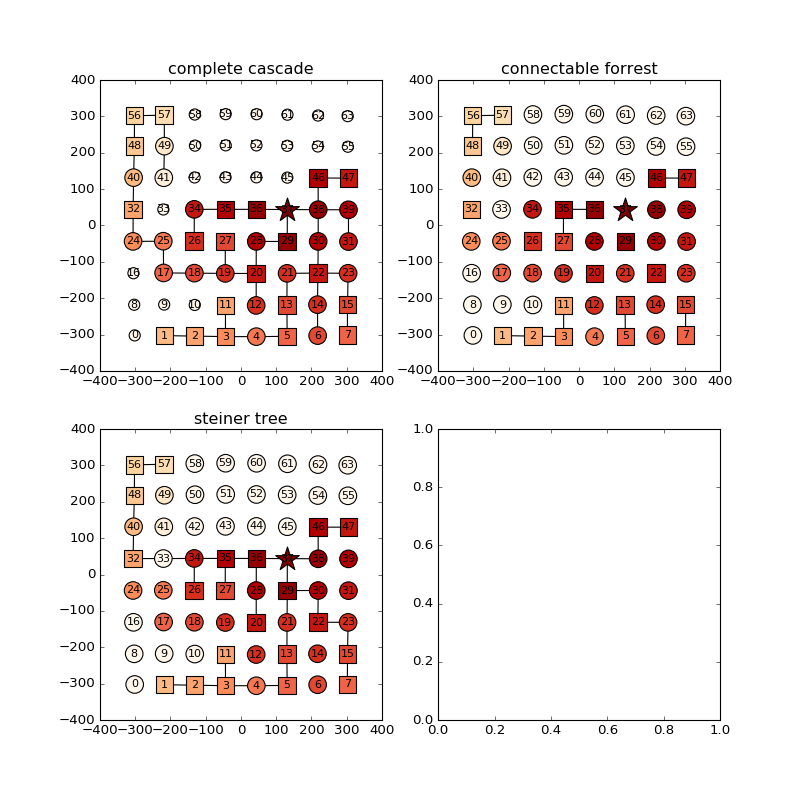

In [27]:
from plot_utils import plot_snapshot
from utils import extract_edges


fig, ax = plt.subplots(2,2, figsize=(10, 10))
plot_snapshot(gnx, pos, infection_times, queried_nodes=obs_nodes, source_node=source, with_labels=True,
              ax=ax[0, 0],
              edges=extract_edges(true_tree))
ax[0, 0].set_title('complete cascade')
plot_snapshot(gnx, pos, infection_times, queried_nodes=obs_nodes, source_node=source, with_labels=True,
              ax=ax[0, 1],
              edges=extract_edges(region_graph))
ax[0, 1].set_title('connectable forrest')
plot_snapshot(gnx, pos, infection_times, queried_nodes=obs_nodes, source_node=source, with_labels=True,
              ax=ax[1, 0],
              edges=extract_edges(steiner_tree))
ax[1, 0].set_title('steiner tree')

In [17]:
infection_times, source, obs_nodes, true_tree = gen_nontrivial_cascade(g, p, q, return_tree=True)
from steiner_tree_order import tree_sizes_by_roots
scores, trees = tree_sizes_by_roots(g, obs_nodes, infection_times, source,
                                    method='region_mst', return_trees=True)

winner = np.argmax(scores)
source_tree = trees[source]
winner_tree = trees[winner]
print(scores[source])
print(scores[winner])
print(get_rank_index(scores, source))

-8.0
-8.0
0.0


<IPython.core.display.Javascript object>


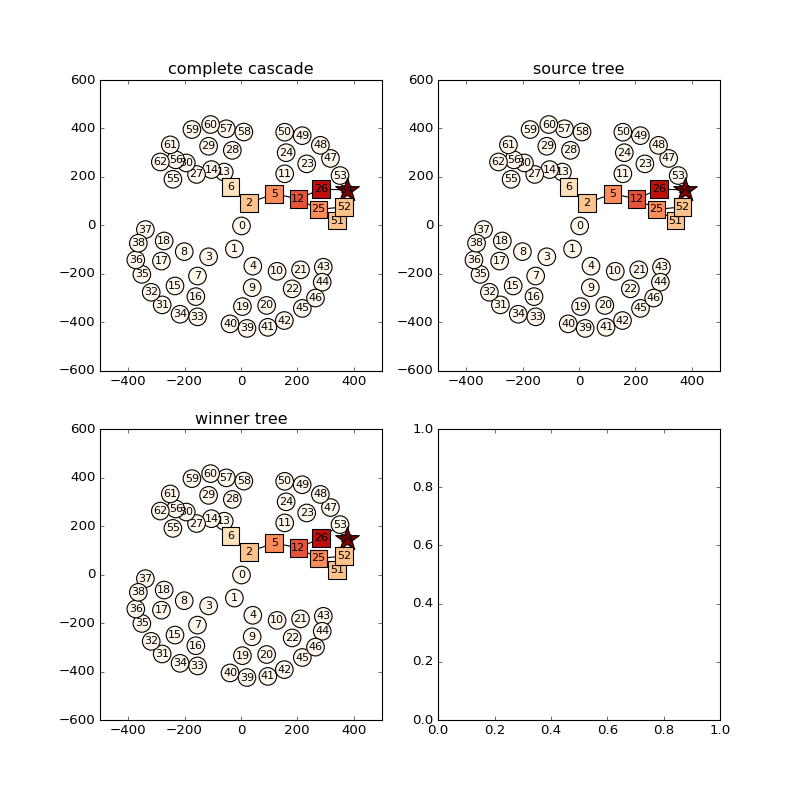

In [10]:
from plot_utils import plot_snapshot
from utils import extract_edges


fig, ax = plt.subplots(2,2, figsize=(10, 10))
plot_snapshot(gnx, pos, infection_times, queried_nodes=obs_nodes, source_node=source, with_labels=True,
              ax=ax[0, 0],
              edges=extract_edges(true_tree))
ax[0, 0].set_title('complete cascade')
plot_snapshot(gnx, pos, infection_times, queried_nodes=obs_nodes, source_node=source, with_labels=True,
              ax=ax[0, 1],
              edges=extract_edges(source_tree))
ax[0, 1].set_title('source tree')
plot_snapshot(gnx, pos, infection_times, queried_nodes=obs_nodes, source_node=source, with_labels=True,
              ax=ax[1, 0],
              edges=extract_edges(winner_tree))
ax[1, 0].set_title('winner tree')